In [ ]:
import torch
import numpy as np

## 3.1 Автоматическое дифференцирование в `torch`

3.1.1 Воспользовавшись классами `Neuron` и `SquaredLoss` из задачи 2.4.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать стохастический градиетный спуск.

In [ ]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [ ]:
class Neuron:
    def __init__(self, n_inputs):
        # <создать атрибуты объекта weights и bias>
        # Создаем случайные веса и смещение нужных размерностей
        self.W = torch.randn(n_inputs)
        self.B = torch.randn(1)    
  
    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.W.T) + self.B
      
    def backward(self, dvalue):
         
        self.dweights = dvalue * self.inputs
        self.dinput =  dvalue * self.W
        self.dbias = dvalue 
        
        # Возвращаем градиент весов и смещения
        return self.dweights, self.dbias

class SquaredLoss:
  def forward(self, y_pred, y_true):
    self.y_pred = torch.tensor(y_pred, requires_grad=True)
    y_true = torch.tensor(y_true)
    z = (self.y_pred - y_true) ** 2
    self.z = z
    return z

  def backward(self):
    self.z.backward()
    self.dinput = self.y_pred.grad


In [ ]:
n_inputs = 4# <размерность элемента выборки >
learning_rate = 0.01 #  скорость обучения
n_epoch = 100 #  количество эпох
batch_size = 10

neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
for epoch in range(100):
  sample = torch.randint(0, X.shape[0], size=(batch_size,))
  for x_example, y_example in zip(X[sample], y[sample]):
    # forward pass
    y_pred = neuron.forward(x_example)
    curr_loss = loss.forward(y_pred, y_example)
    losses.append(curr_loss)

    # backward pass
    loss.backward()
    dweights, dbias = neuron.backward(loss.dinput)

    # update weights
    neuron.W -= learning_rate * dweights
    neuron.B -= learning_rate * dbias
  print(f"Epoch {epoch} loss: {curr_loss}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2981.)
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor

Epoch 0 loss: tensor([11974.2051], grad_fn=<PowBackward0>)
Epoch 1 loss: tensor([2608.8486], grad_fn=<PowBackward0>)
Epoch 2 loss: tensor([4992.9136], grad_fn=<PowBackward0>)
Epoch 3 loss: tensor([7.9374], grad_fn=<PowBackward0>)
Epoch 4 loss: tensor([662.3904], grad_fn=<PowBackward0>)
Epoch 5 loss: tensor([640.8123], grad_fn=<PowBackward0>)
Epoch 6 loss: tensor([170.5280], grad_fn=<PowBackward0>)
Epoch 7 loss: tensor([0.6339], grad_fn=<PowBackward0>)
Epoch 8 loss: tensor([218.5606], grad_fn=<PowBackward0>)
Epoch 9 loss: tensor([39.9030], grad_fn=<PowBackward0>)
Epoch 10 loss: tensor([64.1313], grad_fn=<PowBackward0>)
Epoch 11 loss: tensor([1.9663], grad_fn=<PowBackward0>)
Epoch 12 loss: tensor([23.0864], grad_fn=<PowBackward0>)
Epoch 13 loss: tensor([0.4170], grad_fn=<PowBackward0>)
Epoch 14 loss: tensor([0.4293], grad_fn=<PowBackward0>)
Epoch 15 loss: tensor([6.1182], grad_fn=<PowBackward0>)
Epoch 16 loss: tensor([0.2745], grad_fn=<PowBackward0>)
Epoch 17 loss: tensor([0.0016], grad_

3.1.2 Воспользовавшись классами `Linear` и `MSELoss` из задачи 2.1.4 и 2.3.1, `ReLU` из 2.2.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать пакетный градиентный спуск. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [ ]:
X = torch.FloatTensor(torch.linspace(0, 1, 100).view(-1, 1))
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

class ReLU:
    def forward(self, inputs):
        inputs[inputs < 0] = 0
        return inputs
    
class MSELoss:
  def forward(self, y_pred, y_true):
    self.y_pred = torch.tensor(y_pred, requires_grad=True)
    y_true = torch.tensor(y_true)
    z = ((self.y_pred - y_true) ** 2).mean()
    self.z = z
    return z

  def backward(self):
    self.z.backward()
    self.dinput = self.y_pred.grad

class Linear:
    def __init__(self, n_features, n_neurons):
        self.weights = torch.randn(n_features, n_neurons)
        self.biases = torch.randn(n_neurons)
    
    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.biases
    
    def backward(self, dvalues):
        self.dweights = torch.matmul(self.inputs.T, dvalues)
        self.dbiases = torch.sum(dvalues, axis=0)
        self.dinputs = torch.matmul(dvalues, self.weights.T)
        return self.dweights, self.dbiases



In [ ]:
n_inputs = 1# <размерность элемента выборки >
learning_rate = 0.01 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Linear(1, 1)
loss = MSELoss()
activation = ReLU()

losses = []
for epoch in range(n_epoch):
    y_pred = activation.forward(neuron.forward(X))

    curr_loss = loss.forward(y_pred, y)
    #print(loss.z)
    losses.append(curr_loss)

    # backward pass
    loss.backward()
    dweights, dbias = neuron.backward(loss.dinput)
    #print(loss.dinput)

    # update weights
    neuron.weights -= learning_rate * dweights
    neuron.biases -= learning_rate * dbias
    print(f"Epoch {epoch} loss: {curr_loss}")

Epoch 0 loss: 2.3058769702911377
Epoch 1 loss: 2.2186713218688965
Epoch 2 loss: 2.135784387588501
Epoch 3 loss: 2.056999921798706
Epoch 4 loss: 1.9821122884750366
Epoch 5 loss: 1.9109264612197876
Epoch 6 loss: 1.843258023262024
Epoch 7 loss: 1.7789300680160522
Epoch 8 loss: 1.7177757024765015
Epoch 9 loss: 1.6596364974975586
Epoch 10 loss: 1.604360818862915
Epoch 11 loss: 1.5518062114715576
Epoch 12 loss: 1.5018359422683716
Epoch 13 loss: 1.454321265220642
Epoch 14 loss: 1.409138798713684
Epoch 15 loss: 1.3661723136901855
Epoch 16 loss: 1.3253109455108643
Epoch 17 loss: 1.2864493131637573
Epoch 18 loss: 1.2494869232177734
Epoch 19 loss: 1.214329481124878
Epoch 20 loss: 1.1808863878250122
Epoch 21 loss: 1.1490720510482788
Epoch 22 loss: 1.1188048124313354
Epoch 23 loss: 1.0900077819824219
Epoch 24 loss: 1.0626070499420166
Epoch 25 loss: 1.0365328788757324
Epoch 26 loss: 1.0117191076278687
Epoch 27 loss: 0.9881026744842529
Epoch 28 loss: 0.9656236171722412
Epoch 29 loss: 0.94422531127929

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':


## 3.2 Алгоритмы оптимизации в `torch.optim`

In [ ]:
import torch.optim as optim

3.2.1 Решить задачу 3.1.1, воспользовавшись оптимизатором `optim.SDG` для применения стохастического градиентого спуска

In [ ]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [ ]:
class Neuron:
    def __init__(self, n_inputs):
        # <создать атрибуты объекта weights и bias>
        # Создаем случайные веса и смещение нужных размерностей
        self.W = torch.nn.Parameter(torch.randn(1, n_inputs, requires_grad=True))
        self.B = torch.nn.Parameter(torch.randn(1, requires_grad=True))
      
    def parameters(self):
        yield self.W
        yield self.B
  
    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.W.T) + self.B
      
    def backward(self, dvalue):
        with torch.no_grad():
         
          self.dweights = dvalue * self.inputs
          self.dinput =  dvalue * self.W
          self.dbias = dvalue 
        
        # Возвращаем градиент весов и смещения
        return self.dweights, self.dbias

class SquaredLoss:
  def forward(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    self.loss = (y_pred - y_true)**2
    return self.loss

  def backward(self):
    y_pred = torch.autograd.Variable(self.y_pred, requires_grad=True)
    y_true = torch.autograd.Variable(self.y_true, requires_grad=False)
    ((y_pred - y_true)**2).backward()
    self.dinput = y_pred.grad

In [ ]:
n_inputs = 4# <размерность элемента выборки >
learning_rate = 0.001 #  скорость обучения
n_epoch = 100 #  количество эпох
batch_size = 10

neuron = Neuron(n_inputs)
optimizer = optim.SGD(neuron.parameters(), lr=learning_rate)
# print(optimizer.param_groups)
loss = SquaredLoss()

losses = []
for epoch in range(100):
  for x_example, y_example in zip(X, y):
      optimizer.zero_grad()
      # forward pass
      y_pred = neuron.forward(x_example)
      curr_loss = loss.forward(y_pred, y_example)
      losses.append(curr_loss)

      # backward pass
      optimizer = torch.optim.SGD(neuron.parameters(), learning_rate)
      optimizer.zero_grad()
      loss.forward(y_pred, y_example).backward()
      optimizer.step()
      
  print(f"Epoch {epoch} loss: {curr_loss}")
  # print(optimizer.param_groups)

Epoch 0 loss: tensor([3755.0574], grad_fn=<PowBackward0>)
Epoch 1 loss: tensor([2450.0933], grad_fn=<PowBackward0>)
Epoch 2 loss: tensor([1586.8700], grad_fn=<PowBackward0>)
Epoch 3 loss: tensor([1019.0901], grad_fn=<PowBackward0>)
Epoch 4 loss: tensor([648.0484], grad_fn=<PowBackward0>)
Epoch 5 loss: tensor([407.3742], grad_fn=<PowBackward0>)
Epoch 6 loss: tensor([252.6056], grad_fn=<PowBackward0>)
Epoch 7 loss: tensor([154.0840], grad_fn=<PowBackward0>)
Epoch 8 loss: tensor([92.1203], grad_fn=<PowBackward0>)
Epoch 9 loss: tensor([53.7130], grad_fn=<PowBackward0>)
Epoch 10 loss: tensor([30.3312], grad_fn=<PowBackward0>)
Epoch 11 loss: tensor([16.4172], grad_fn=<PowBackward0>)
Epoch 12 loss: tensor([8.3811], grad_fn=<PowBackward0>)
Epoch 13 loss: tensor([3.9262], grad_fn=<PowBackward0>)
Epoch 14 loss: tensor([1.6014], grad_fn=<PowBackward0>)
Epoch 15 loss: tensor([0.5034], grad_fn=<PowBackward0>)
Epoch 16 loss: tensor([0.0799], grad_fn=<PowBackward0>)
Epoch 17 loss: tensor([0.0016], gr

3.2.2 Решить задачу 3.1.2, воспользовавшись оптимизатором `optim.Adam` для применения пакетного градиентого спуска. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [ ]:
X = torch.FloatTensor(torch.linspace(0, 1, 100).view(-1, 1))
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

class ReLU:
    def forward(self, inputs):
        inputs[inputs < 0] = 0
        return inputs
    
class MSELoss:
  def forward(self, y_pred, y_true):
    self.loss = ((y_pred - y_true)**2).mean()
    return self.loss

  def backward(self, y_pred, y_true):
    y_pred = torch.autograd.Variable(y_pred, requires_grad=True)
    y_true = torch.autograd.Variable(y_true, requires_grad=False)
    (((y_pred - y_true)**2).mean()).backward()
    self.dinput = y_pred.grad

class Linear:
    def __init__(self, n_features, n_neurons):
        self.weights = torch.nn.Parameter(torch.randn(n_features, n_neurons), requires_grad=True) 
        self.biases = torch.nn.Parameter(torch.randn(n_neurons), requires_grad=True)
      
    def parameters(self):
        yield self.weights
        yield self.biases
    
    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.biases
    
    def backward(self, dvalues):
        self.dweights = torch.matmul(self.inputs.T, dvalues)
        self.dbiases = torch.sum(dvalues, axis=0)
        self.dinputs = torch.matmul(dvalues, self.weights.T)
        return self.dweights, self.dbiases


In [ ]:
neuron_1 = Linear(1, 100)
neuron_2 = Linear(100, 1)
loss = MSELoss()
activation = ReLU()
optimizer = optim.Adam([{'params': neuron_1.parameters()}, {'params': neuron_2.parameters()}], lr=0.01)

losses = []
for epoch in range(500):
    # forward pass
    y_pred = neuron_2.forward(activation.forward(neuron_1.forward(X)))
    # y_pred = neuron_2.forward(neuron_1.forward(X))
    curr_loss = loss.forward(y_pred, y)
    losses.append(curr_loss)

    # backward pass
    optimizer.zero_grad()
    loss.forward(y_pred, y).backward()
    optimizer.step()
    print(f"Epoch {epoch} loss: {curr_loss}")

Epoch 0 loss: 3.853825092315674
Epoch 1 loss: 2.687979221343994
Epoch 2 loss: 2.047274351119995
Epoch 3 loss: 1.435421109199524
Epoch 4 loss: 0.9206600785255432
Epoch 5 loss: 0.623136579990387
Epoch 6 loss: 0.4487867057323456
Epoch 7 loss: 0.30159956216812134
Epoch 8 loss: 0.22068829834461212
Epoch 9 loss: 0.24662992358207703
Epoch 10 loss: 0.31665369868278503
Epoch 11 loss: 0.3635810613632202
Epoch 12 loss: 0.405632883310318
Epoch 13 loss: 0.46548396348953247
Epoch 14 loss: 0.5106430649757385
Epoch 15 loss: 0.5102164149284363
Epoch 16 loss: 0.48280999064445496
Epoch 17 loss: 0.4548150897026062
Epoch 18 loss: 0.41997599601745605
Epoch 19 loss: 0.36499008536338806
Epoch 20 loss: 0.30253639817237854
Epoch 21 loss: 0.2535729706287384
Epoch 22 loss: 0.21824230253696442
Epoch 23 loss: 0.18506751954555511
Epoch 24 loss: 0.15666666626930237
Epoch 25 loss: 0.14437809586524963
Epoch 26 loss: 0.14595775306224823
Epoch 27 loss: 0.1492205262184143
Epoch 28 loss: 0.15192651748657227
Epoch 29 loss: 

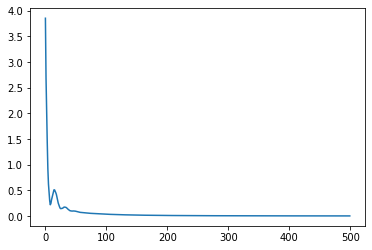

In [ ]:
import matplotlib.pyplot as plt

with torch.no_grad():
  plt.plot(losses)

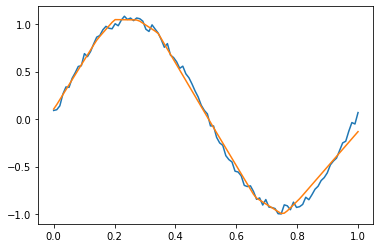

In [ ]:
import matplotlib.pyplot as plt

with torch.no_grad():
  plt.plot(X, y)
  plt.plot(X, neuron_2.forward(activation.forward(neuron_1.forward(X))))

## 3.3 Построение сетей при помощи `torch.nn`

In [ ]:
import torch.nn as nn

3.3.1 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде класса - наследника `nn.Module`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim` 

In [ ]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

In [ ]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

neuron = SineNet(3)
optimizer = optim.Adam(neuron.parameters(), lr=0.01)
loss = torch.nn.MSELoss()

for epoch in range(2000):
    optimizer.zero_grad()

    y_pred = neuron.forward(X)
    loss_val = loss(y_pred, y)

    loss_val.backward()

    optimizer.step()
    
    if epoch % 100 == 0: print(f"Epoch {epoch} loss: {loss_val}")

Epoch 0 loss: 0.5386536121368408
Epoch 100 loss: 0.31417039036750793
Epoch 200 loss: 0.18773768842220306
Epoch 300 loss: 0.1847917139530182
Epoch 400 loss: 0.18054021894931793
Epoch 500 loss: 0.17463484406471252
Epoch 600 loss: 0.166963592171669
Epoch 700 loss: 0.15761804580688477
Epoch 800 loss: 0.1465131938457489
Epoch 900 loss: 0.13235145807266235
Epoch 1000 loss: 0.11186767369508743
Epoch 1100 loss: 0.08399713784456253
Epoch 1200 loss: 0.055266790091991425
Epoch 1300 loss: 0.033549126237630844
Epoch 1400 loss: 0.02091931365430355
Epoch 1500 loss: 0.014945938251912594
Epoch 1600 loss: 0.01244619581848383
Epoch 1700 loss: 0.01135332603007555
Epoch 1800 loss: 0.010719925165176392
Epoch 1900 loss: 0.010149325244128704


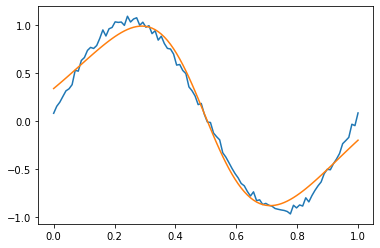

In [ ]:
with torch.no_grad():
  plt.plot(X, y)
  plt.plot(X, neuron(X))

3.3.2 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде объекта `nn.Sequential`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim` 

In [ ]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

layers = [
    torch.nn.Linear(1, 5),
    torch.nn.Sigmoid(),
    torch.nn.Linear(5, 1)
]
model = torch.nn.Sequential(*layers)

optimizer = optim.Adam(model.parameters(), lr=0.01)
loss = torch.nn.MSELoss()

for epoch in range(2000):
    optimizer.zero_grad()

    y_pred = model.forward(X)
    loss_val = loss(y_pred, y)

    loss_val.backward()

    optimizer.step()
    
    if epoch % 100 == 0: print(f"Epoch {epoch} loss: {loss_val}")

Epoch 0 loss: 0.4876212775707245
Epoch 100 loss: 0.19528909027576447
Epoch 200 loss: 0.18962225317955017
Epoch 300 loss: 0.1878425031900406
Epoch 400 loss: 0.18477432429790497
Epoch 500 loss: 0.17927859723567963
Epoch 600 loss: 0.16958017647266388
Epoch 700 loss: 0.1550215631723404
Epoch 800 loss: 0.12056023627519608
Epoch 900 loss: 0.06769632548093796
Epoch 1000 loss: 0.028309235349297523
Epoch 1100 loss: 0.01058168150484562
Epoch 1200 loss: 0.005030478350818157
Epoch 1300 loss: 0.0035396453458815813
Epoch 1400 loss: 0.0028025314677506685
Epoch 1500 loss: 0.002277930034324527
Epoch 1600 loss: 0.0018953063990920782
Epoch 1700 loss: 0.0016175475902855396
Epoch 1800 loss: 0.0014145689783617854
Epoch 1900 loss: 0.0012705614790320396


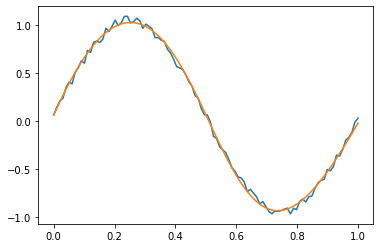

In [ ]:
with torch.no_grad():
  plt.plot(X, y)
  plt.plot(X, model(X))

## 3.4. Datasets and dataloaders

In [ ]:
from torch.utils.data import Dataset, DataLoader

3.4.1 Создать датасет, поставляющий данные из задачи 3.1.2. 

Создать `DataLoader` на основе этого датасета и проверить работоспособность.

Воспользовавшись результатами 3.3.1 (или 3.3.2) обучите модель, пользуясь мини-пакетным градиентным спуском с размером пакета (`batch_size`) = 10

In [ ]:
class SinDataset(Dataset):
  def __init__(self):
    self.X = torch.linspace(0, 1, 100).view(-1, 1)
    self.y = torch.sin(2 * np.pi * self.X) + 0.1 * torch.rand(self.X.size()) 

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [ ]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

neuron = SineNet(3)
optimizer = optim.Adam(neuron.parameters(), lr=0.01)
loss = torch.nn.MSELoss()
dataloader = DataLoader(SinDataset(), batch_size=10)

for epoch in range(2000):
    X_new, y_new = next(iter(dataloader))
    optimizer.zero_grad()

    y_pred = neuron.forward(X_new)
    loss_val = loss(y_pred, y_new)

    loss_val.backward()

    optimizer.step()
    
    if epoch % 100 == 0: print(f"Epoch {epoch} loss: {loss_val}")

Epoch 0 loss: 0.1360023468732834
Epoch 100 loss: 0.023825522512197495
Epoch 200 loss: 0.021264640614390373
Epoch 300 loss: 0.01690227910876274
Epoch 400 loss: 0.01045158039778471
Epoch 500 loss: 0.004398830235004425
Epoch 600 loss: 0.001501718652434647
Epoch 700 loss: 0.000864460482262075
Epoch 800 loss: 0.000791870232205838
Epoch 900 loss: 0.0007812554249539971
Epoch 1000 loss: 0.000773935578763485
Epoch 1100 loss: 0.0007664604345336556
Epoch 1200 loss: 0.0007588525186292827
Epoch 1300 loss: 0.000751226325519383
Epoch 1400 loss: 0.0007436712039634585
Epoch 1500 loss: 0.0007362522301264107
Epoch 1600 loss: 0.0007290017092600465
Epoch 1700 loss: 0.0007219315739348531
Epoch 1800 loss: 0.0007150302990339696
Epoch 1900 loss: 0.0007082775118760765


3.4.2 Предсказание цен алмазов

3.4.2.1 Создайте датасет на основе файла diamonds.csv. 

1. Удалите все нечисловые столбцы
2. Целевой столбец (`y`) - `price`
3. Преобразуйте данные в тензоры корректных размеров

3.4.2.2 Разбейте датасет на обучающий и тестовый датасет при помощи `torch.utils.data.random_split`.

3.4.2.3 Обучите модель для предсказания цен при помощи мини-пакетного градиентного спуска (`batch_size = 256`). 

3.4.2.4 Выведите график функции потерь в зависимости от номера эпохи (значение потерь для эпохи рассчитывайте как среднее значение ошибок на каждом батче). Проверьте качество модели на тестовой выборке. 


In [9]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader


class DiamondsDataset(Dataset):
  def __init__(self, data):
    super().__init__()
    self.data = pd.read_csv(data, index_col = [0])

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    self.X = torch.FloatTensor(self.data.select_dtypes(['number']).values)
    self.y = torch.FloatTensor(self.data['price'].values)
    return self.X[idx], self.y[idx]

In [20]:
dataset = DiamondsDataset('diamonds.csv')

train, test = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), int(len(dataset)*0.2)])

diamonds_dataloader_train = DataLoader(train, batch_size=256)
diamonds_dataloader_test = DataLoader(test, batch_size=256)

In [21]:
class DiamondsNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons, n_features):
        super(DiamondsNet, self).__init__()
        self.fc1 = torch.nn.Linear(n_hidden_neurons, n_features)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_features, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

neuron = DiamondsNet(7, 49)
optimizer = torch.optim.SGD(neuron.parameters(), lr=0.025)
loss = torch.nn.MSELoss()

loss_vals = []
for epoch in range(20):
    X_new, y_new = next(iter(diamonds_dataloader_train))
    optimizer.zero_grad()

    y_pred = neuron.forward(X_new)
    loss_val = loss(y_pred, y_new)
    loss_vals.append(loss_val)

    loss_val.backward()

    optimizer.step()
    
    print(f"Epoch {epoch} loss: {loss_val}")

Epoch 0 loss: 24152918.0
Epoch 1 loss: 13928083.0
Epoch 2 loss: 12949975.0
Epoch 3 loss: 12751903.0
Epoch 4 loss: 12711796.0
Epoch 5 loss: 12703672.0
Epoch 6 loss: 12702028.0
Epoch 7 loss: 12701696.0
Epoch 8 loss: 12701627.0
Epoch 9 loss: 12701614.0
Epoch 10 loss: 12701611.0
Epoch 11 loss: 12701612.0
Epoch 12 loss: 12701611.0
Epoch 13 loss: 12701610.0
Epoch 14 loss: 12701610.0
Epoch 15 loss: 12701611.0
Epoch 16 loss: 12701611.0
Epoch 17 loss: 12701610.0
Epoch 18 loss: 12701611.0
Epoch 19 loss: 12701611.0


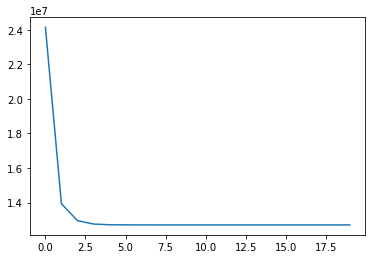

In [23]:
import matplotlib.pyplot as plt

with torch.no_grad():
  plt.plot(loss_vals)

3.4.3 Модифицируйте метод `__init__` датасета из 3.4.2 таким образом, чтобы он мог принимать параметр `transform: callable`. Реализуйте класс `DropColsTransform` для удаления нечисловых данных из массива. Реализуйте класс `ToTensorTransorm` для трансформации массива в тензор.

In [113]:
class DiamondsDataset(Dataset):
  def __init__(self, data, transform=None):
    self.data = pd.read_csv(data, index_col = [0])
    self.transform = transform

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    X = self.data.drop('price', axis=1)
    y = self.data['price']
    sample = X.iloc[idx], y.iloc[idx]
    if self.transform:
      sample = self.transform(sample)
    return sample

In [127]:
class DropColsTransform:
  def __init__(self, drop):
    self.drop = drop
  
  def __call__(self, sample):
    X, y = sample
    X = X.drop(X.index[self.drop], axis=0)
    return X, y

In [128]:
class ToTensorTransform:
  def __call__(self, sample):
    X, y = sample
    X = torch.FloatTensor(X.astype('float64').values)
    y = torch.FloatTensor([y])
    return X, y

In [129]:
from torchvision import transforms

drop = DropColsTransform(drop=[1, 2, 3])
to_tensor = ToTensorTransform()
dataset = DiamondsDataset('diamonds.csv', transform=transforms.Compose([drop, to_tensor]))


In [143]:
train, test = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), int(len(dataset)*0.2)])

diamonds_dataloader_train = DataLoader(train, batch_size=256)
diamonds_dataloader_test = DataLoader(test, batch_size=256)

In [144]:
class DiamondsNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons, n_features):
        super(DiamondsNet, self).__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Linear(n_features, n_hidden_neurons), 
            torch.nn.Sigmoid(), 
            torch.nn.Linear(n_hidden_neurons,n_hidden_neurons),
            torch.nn.Sigmoid(),
            torch.nn.Linear(n_hidden_neurons,n_hidden_neurons*2),
            torch.nn.Sigmoid(),
            torch.nn.Linear(n_hidden_neurons*2,1)
        )

    def forward(self, x):
        x = self.net(x)
        return x

neuron = DiamondsNet(16, 6)
optimizer = torch.optim.SGD(neuron.parameters(), lr=0.01)
loss = torch.nn.MSELoss()

loss_vals = []
for epoch in range(20):
    X_new, y_new = next(iter(diamonds_dataloader_train))
    optimizer.zero_grad()

    y_pred = neuron.forward(X_new)
    loss_val = loss(y_pred, y_new)
    loss_vals.append(loss_val)

    loss_val.backward()

    optimizer.step()
    
    print(f"Epoch {epoch} loss: {loss_val}")

Epoch 0 loss: 31515842.0
Epoch 1 loss: 27090798.0
Epoch 2 loss: 19535812.0
Epoch 3 loss: 16133378.0
Epoch 4 loss: 15017710.0
Epoch 5 loss: 14800786.0
Epoch 6 loss: 14750708.0
Epoch 7 loss: 14736909.0
Epoch 8 loss: 14736092.0
Epoch 9 loss: 14735919.0
Epoch 10 loss: 14735880.0
Epoch 11 loss: 14735872.0
Epoch 12 loss: 14735872.0
Epoch 13 loss: 14735872.0
Epoch 14 loss: 14735872.0
Epoch 15 loss: 14735870.0
Epoch 16 loss: 14735872.0
Epoch 17 loss: 14735870.0
Epoch 18 loss: 14735872.0
Epoch 19 loss: 14735871.0


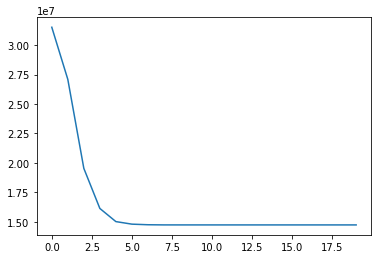

In [145]:
with torch.no_grad():
  plt.plot(loss_vals)